In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf

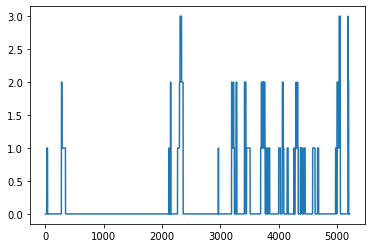

In [2]:
df = pd.read_csv(r"C:\Users\Master\Downloads\csv(5).csv", usecols=[1], engine='python')
plt.plot(df)
plt.show()

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
dataset = df.values
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

3496 1723


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [6]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
1747/1747 - 5s - loss: 0.1712
Epoch 2/20
1747/1747 - 3s - loss: 0.0348
Epoch 3/20
1747/1747 - 4s - loss: 0.0196
Epoch 4/20
1747/1747 - 4s - loss: 0.0167
Epoch 5/20
1747/1747 - 4s - loss: 0.0161
Epoch 6/20
1747/1747 - 4s - loss: 0.0158
Epoch 7/20
1747/1747 - 4s - loss: 0.0157
Epoch 8/20
1747/1747 - 4s - loss: 0.0156
Epoch 9/20
1747/1747 - 4s - loss: 0.0155
Epoch 10/20
1747/1747 - 4s - loss: 0.0154
Epoch 11/20
1747/1747 - 4s - loss: 0.0152
Epoch 12/20
1747/1747 - 4s - loss: 0.0153
Epoch 13/20
1747/1747 - 4s - loss: 0.0152
Epoch 14/20
1747/1747 - 4s - loss: 0.0150
Epoch 15/20
1747/1747 - 4s - loss: 0.0151
Epoch 16/20
1747/1747 - 4s - loss: 0.0149
Epoch 17/20
1747/1747 - 3s - loss: 0.0149
Epoch 18/20
1747/1747 - 3s - loss: 0.0148
Epoch 19/20
1747/1747 - 4s - loss: 0.0144
Epoch 20/20
1747/1747 - 4s - loss: 0.0147


In [7]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.36 RMSE
Test Score: 0.61 RMSE


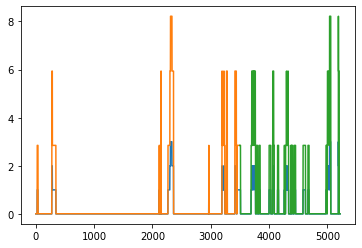

In [8]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [9]:
trainPredict


array([[0.00688183],
       [0.00688183],
       [0.00688183],
       ...,
       [2.8490214 ],
       [2.8490214 ],
       [2.8490214 ]], dtype=float32)